# Phase 2 Project


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [2]:
home = pd.read_csv('data/kc_house_data.csv')

In [3]:
home.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [4]:
home.shape

(21597, 21)

In [5]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Cleaning Data

In [6]:
home.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
home['waterfront'].fillna(0, inplace = True)

In [8]:
home['view'].fillna(0, inplace = True)

In [9]:
#home.isnull().sum()

In [10]:
home = home.drop(columns = ['id'], axis = 1)

In [11]:
home = home[(home != '?').all(axis=1)]

In [12]:
home['sqft_basement'] = home['sqft_basement'].astype(float)

** Modified the Grading Column by Grouping **

grades 1 = (1-3)

grades 2 = (4-6)

grades 3 = (7-9)

grades 4 = (9-10)

grades 5 = (11-13)

In [13]:
home.loc[home['grade'] == 1, 'grade'] = 1
home.loc[home['grade'] == 2, 'grade'] = 1
home.loc[home['grade'] == 3, 'grade'] = 1
home.loc[home['grade'] == 4, 'grade'] = 2
home.loc[home['grade'] == 5, 'grade'] = 2
home.loc[home['grade'] == 6, 'grade'] = 2
home.loc[home['grade'] == 7, 'grade'] = 3
home.loc[home['grade'] == 8, 'grade'] = 3
home.loc[home['grade'] == 9, 'grade'] = 4
home.loc[home['grade'] == 10, 'grade'] = 4
home.loc[home['grade'] == 11, 'grade'] = 5
home.loc[home['grade'] == 12, 'grade'] = 5
home.loc[home['grade'] == 13, 'grade'] = 5

In [14]:
home['grade'].value_counts()

3    14721
4     3669
2     2259
5      493
1        1
Name: grade, dtype: int64

In [15]:
home['date'] = pd.to_datetime(home['date'])

In [16]:
#taking out the bedroom outlier
home = home[home['bedrooms'] <15]

** We drop Date and Year Renovatied created a age column instead **

In [17]:
home['year'] = home['date'].apply(lambda date: date.year)
home['age'] = np.where(home['yr_renovated']>0, home['year'] - home['yr_renovated'], home['year']-home['yr_built'])
home = home.drop('year',axis =1)
home = home.drop('yr_built', axis =1)
home = home.drop('yr_renovated',axis =1)
home = home.drop('date', axis =1)

In [18]:
home.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,3,1180,0.0,98178,47.5112,-122.257,1340,5650,59.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,3,2170,400.0,98125,47.7210,-122.319,1690,7639,23.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,2,770,0.0,98028,47.7379,-122.233,2720,8062,82.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,3,1050,910.0,98136,47.5208,-122.393,1360,5000,49.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,3,1680,0.0,98074,47.6168,-122.045,1800,7503,28.0


** We decided as a group to remove because it is not necessary for the buisness question **

In [19]:
home = home.drop(['zipcode', 'lat', 'long', 'grade','waterfront', 'view'], axis =1)

# Looking at our Taget

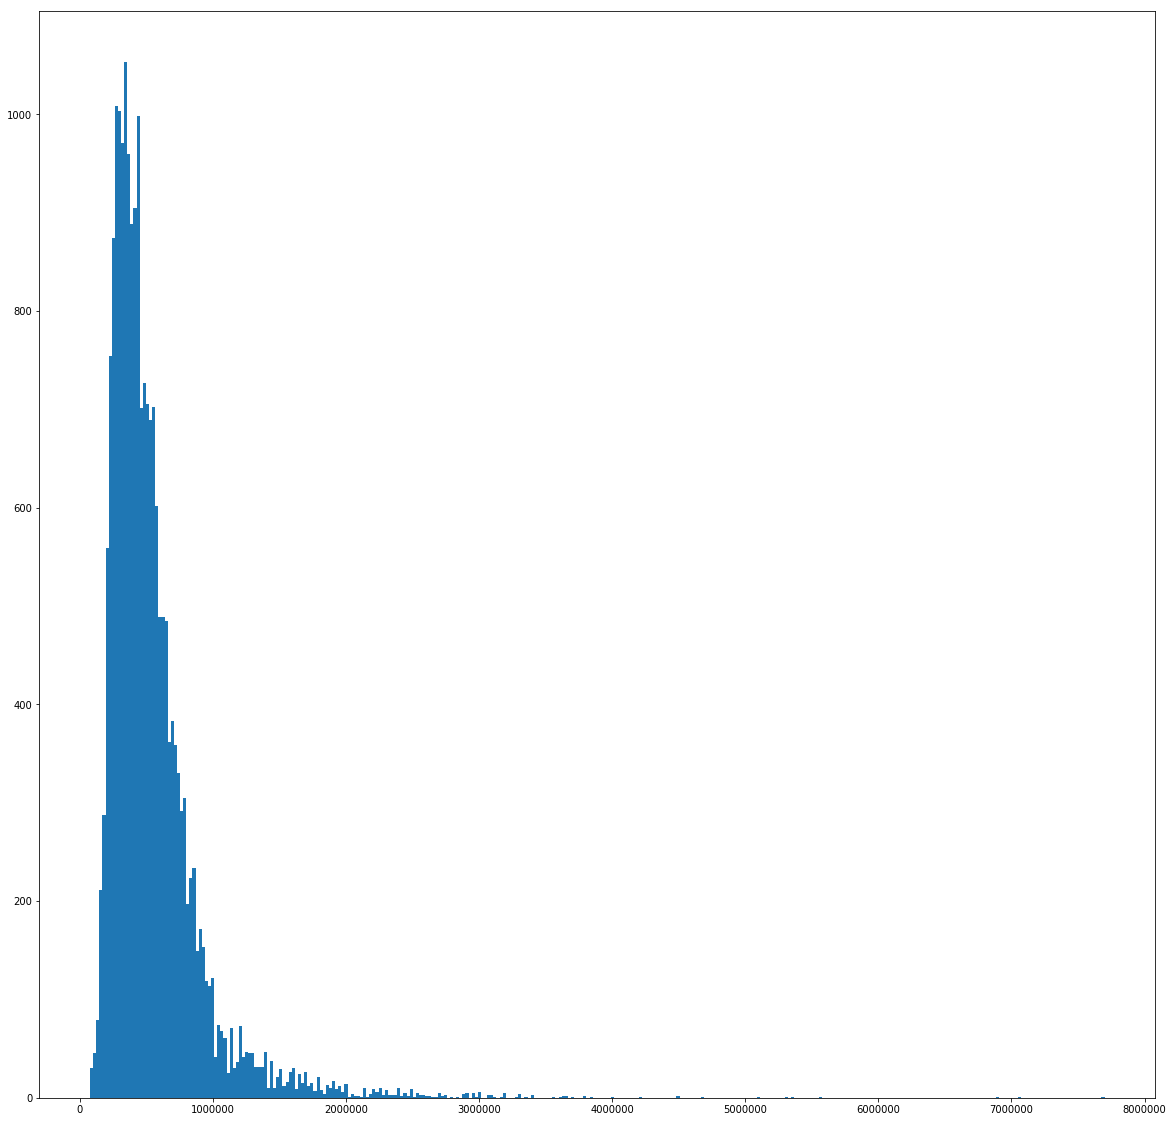

In [20]:
fig, ax = plt.subplots(figsize= (20,20))

ax.hist(home['price'], bins = 'auto');

# Scaling the target to be normally distributed

In [ ]:
home['price'] = np.log(home['price'])

In [ ]:
fig, ax = plt.subplots(figsize= (10,10))

ax.hist(home['price'], bins = 'auto');

# Standarizing to get rid of more outliers

In [21]:
home = home[(home['price'] < (home['price'].mean() + home['price'].std()*3)) & (home['price'] > (home['price'].mean() - home['price'].std()*3))]

# Train / Test


In [22]:
X = home.drop('price', axis = 1)
Y = home['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


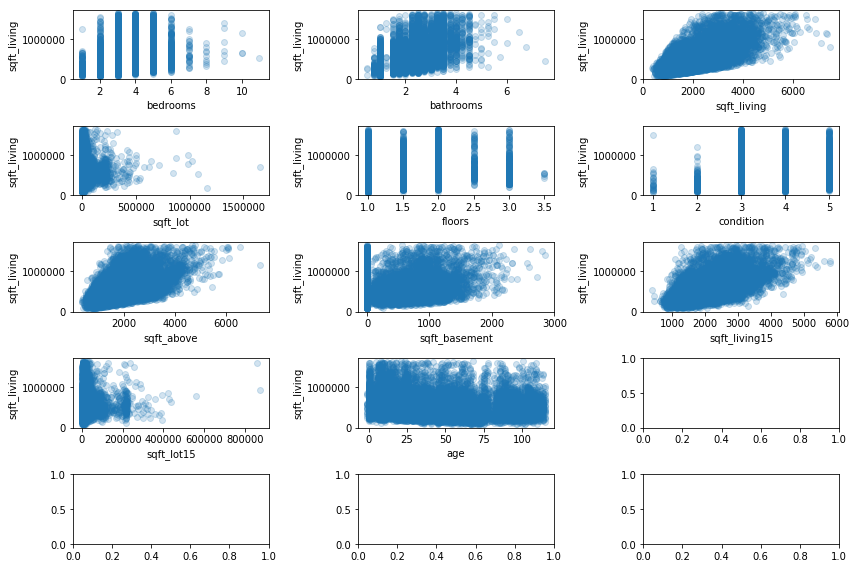

In [24]:
scatterplot_data = X

fig, axes = plt.subplots(ncols= 3, nrows= 5, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X[col], Y, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("sqft_living")

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15555 entries, 1655 to 16430
Data columns (total 11 columns):
bedrooms         15555 non-null int64
bathrooms        15555 non-null float64
sqft_living      15555 non-null int64
sqft_lot         15555 non-null int64
floors           15555 non-null float64
condition        15555 non-null int64
sqft_above       15555 non-null int64
sqft_basement    15555 non-null float64
sqft_living15    15555 non-null int64
sqft_lot15       15555 non-null int64
age              15555 non-null float64
dtypes: float64(4), int64(7)
memory usage: 1.4 MB


/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


Text(0.5,1,'Heatmap of Correlation Between Attributes (Including Target)')

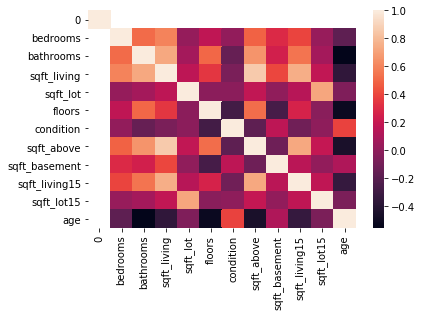

In [26]:
heatmap = pd.concat([y_train, X_train])
corr = heatmap.corr()
sns.heatmap(data = corr)
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)")

In [27]:
home_train_corr = home.corr()['price'].map(abs).sort_values(ascending = False)

In [28]:
home_train_corr

price            1.000000
sqft_living      0.664984
sqft_living15    0.595966
sqft_above       0.566630
bathrooms        0.495473
bedrooms         0.319103
sqft_basement    0.278998
floors           0.277530
age              0.099445
sqft_lot         0.091906
sqft_lot15       0.089227
condition        0.034834
Name: price, dtype: float64

# Base Model

** ssqft_living is the most correlated so that will be our base model **

In [29]:
most_correlated_feature = 'sqft_living'

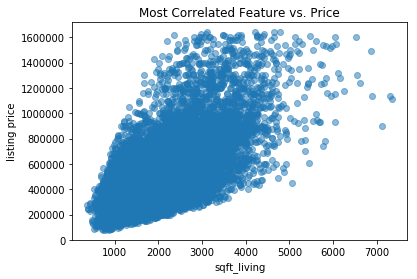

In [30]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

In [31]:
baseline_model = LinearRegression()

In [32]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=45)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4390490911895018
Validation score: 0.4303403717201099


In [33]:
df = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_0', 'level_1'], inplace=True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [34]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.863121
"(sqft_living, sqft_living15)",0.751042


In [35]:
X_train.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)
X_test.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,sqft_lot15,age
1655,4,1.75,1850,6480,1.0,4,730.0,5040,56.0
19896,2,3.00,2210,3917,2.0,3,710.0,3933,6.0
13772,5,1.75,1880,16617,1.0,3,920.0,8400,52.0
3167,3,2.25,2300,12430,1.0,4,720.0,12430,54.0
18567,5,2.50,2510,10240,1.0,4,1100.0,10500,31.0


In [ ]:
#home_trair = X_train.corr()['sqft_living'].map(abs).sort_values(ascending = False)

In [ ]:
#home_trair

# Modeling!

In [37]:
X_train_second_model = X_train

In [38]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.49524285231152315
Validation score: 0.49058358701844024

Baseline Model
Train score:      0.4390490911895018
Validation score: 0.4303403717201099


In [39]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1689.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:50:17   Log-Likelihood:            -2.1059e+05
No. Observations:               15555   AIC:                         4.212e+05
Df Residuals:                   15545   BIC:                         4.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.234e+05   1.17e+04    -10.561      0.000   -1.46e+05      -1e+05
bedrooms      -4.454e+04   2124.198    -20.968      0.000   -4.87e+04   -4.04e+04
bathrooms      4.441e+04   3556.401     12.488      0.000    3.74e+04    5.14e+04
sqft_living     219.8516      3.049     72.112      0.000     213.876     225.827
sqft_lot          0.0274      0.053      0.516      0.606      -0.077       0.131
floors         6.261e+04   3767.028     16.621      0.000    5.52e+04       7e+04
condition      1.658e+04   2522.497      6.574      0.000    1.16e+04    2.15e+04
sqft_basement     3.9504      4.456      0.887      0.375      -4.784      12.685
sqft_lot15       -0.3033      0.077     -3.922      0.000      -0.455      -0.152
age            2222.8438     69.935     31.785      0.000    2085.763    2359.924
==============================================================================
Omnibus:                     2500.647   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5983.513
Skew:                           0.916   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     4.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Removing high P-Values**

In [ ]:
X_train_third_model = X_train.drop( 'sqft_lot', axis = 1)

In [ ]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().summary()

** Removing negative coeff **

In [40]:
X_train_sixth_model = X_train.drop(['sqft_basement', 'sqft_lot', ], axis = 1)

In [41]:
sixth_model = LinearRegression()

sixth_model_scores = cross_validate(
    estimator=sixth_model,
    X=X_train_sixth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", sixth_model_scores["train_score"].mean())
print("Validation score:", sixth_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.49519724671356385
Validation score: 0.4907788680445854

Baseline Model
Train score:      0.4390490911895018
Validation score: 0.4303403717201099


In [42]:
sm.OLS(y_train, sm.add_constant(X_train_sixth_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     2172.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:50:32   Log-Likelihood:            -2.1059e+05
No. Observations:               15555   AIC:                         4.212e+05
Df Residuals:                   15547   BIC:                         4.213e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.238e+05   1.17e+04    -10.618      0.000   -1.47e+05   -1.01e+05
bedrooms    -4.456e+04   2122.485    -20.995      0.000   -4.87e+04   -4.04e+04
bathrooms    4.498e+04   3499.724     12.851      0.000    3.81e+04    5.18e+04
sqft_living   220.8381      2.867     77.034      0.000     215.219     226.457
floors       6.114e+04   3400.356     17.982      0.000    5.45e+04    6.78e+04
condition    1.669e+04   2517.903      6.629      0.000    1.18e+04    2.16e+04
sqft_lot15     -0.2805      0.055     -5.135      0.000      -0.388      -0.173
age          2232.0193     69.208     32.251      0.000    2096.363    2367.676
==============================================================================
Omnibus:                     2501.511   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5982.628
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                       5.423   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X_train.drop(['sqft_basement', 'sqft_lot' ], axis=1, inplace=True)
X_test.drop(['sqft_basement', 'sqft_lot'], axis=1, inplace=True)

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
'sqft_lot'

In [ ]:
X_train.drop( 'sqft_lot', axis=1, inplace=True)
X_test.drop('sqft_lot', axis=1, inplace=True)

# Using One Hot Encoder to create Dummies

In [44]:
categoricals = ['condition']

X_train_categoricals = X_train.loc[:,categoricals]
X_test_categoricals = X_test.loc[:,categoricals]

In [45]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
enc = ohe.fit(X_train_categoricals)
X_train_trans_categ = enc.transform(X_train_categoricals)
X_test_trans_categ = enc.transform(X_test_categoricals)

X_train_trans_categ_df = pd.DataFrame(X_train_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_test_trans_categ_df = pd.DataFrame(X_test_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_train_trans_categ_df.head()

,condition_2,condition_3,condition_4,condition_5
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [46]:
X_train.drop(categoricals, axis=1, inplace=True)
X_test.drop(categoricals, axis=1, inplace=True)

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [47]:
X_train.reset_index(drop=True, inplace=True)
X_train_trans_categ_df.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
X_test_trans_categ_df.reset_index(drop=True, inplace=True)

X_train_with_dummy = pd.concat([X_train, X_train_trans_categ_df], axis=1)
X_test_with_dummy = pd.concat([X_test, X_test_trans_categ_df], axis=1)
X_train_with_dummy.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_lot15,age,condition_2,condition_3,condition_4,condition_5
0,4,1.75,1850,1.0,5040,56.0,0.0,0.0,1.0,0.0
1,2,3.00,2210,2.0,3933,6.0,0.0,1.0,0.0,0.0
2,5,1.75,1880,1.0,8400,52.0,0.0,1.0,0.0,0.0
3,3,2.25,2300,1.0,12430,54.0,0.0,0.0,1.0,0.0
4,5,2.50,2510,1.0,10500,31.0,0.0,0.0,1.0,0.0


In [48]:
X_train_fifth_model = X_train_with_dummy

In [49]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=X_train_fifth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.49595611904450126
Validation score: 0.49094992205598736

Baseline Model
Train score:      0.4390490911895018
Validation score: 0.4303403717201099


In [ ]:
#X_train_with_dummy

In [ ]:
#sm.OLS(y_train, sm.add_constant(X_train_fifth_model)).fit().summary()

In [ ]:
X_train_trans_categ_df.shape



In [ ]:
Y.shape



In [ ]:
X = X_train.reshape(X.shape[1:])

# Trying other dummies

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder object to create dummies by dropping the first category
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
dummies = (X_train[['waterfront','view', 'grade', 'condition']])
enc = ohe.fit(dummies)
trans = enc.transform(dummies)

dummies_test =(X_test[['waterfront', 'view', 'grade', 'condition']])
trans_test = enc.transform(dummies_test)

# Dummies values in matrix form (without column names)
data = trans.todense()

# New dummy column names
names = ohe.get_feature_names(['waterfront', 'view', 'grade','condition'] )

trans_df = pd.DataFrame(data, columns=names)

#X_train_with_dummy = pd.concat([X_train, X_train_trans_categ_df], axis=1)
#X_train_with_dum = pd.concat(X_train, dummies, axis= 1)

In [ ]:
dummies_test

In [ ]:
X_train_with_dum = pd.concat([dummies_test, X_train])

In [ ]:
X_train_with_dum

In [65]:
X_train_with_dummy.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_lot15', 'age',
       'condition_2', 'condition_3', 'condition_4', 'condition_5'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Create OneHotEncoder object to create dummies by dropping the first category
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
dummies = (X_train_with_dummy[['waterfront','view', 'grade', 'condition']])
enc = ohe.fit(dummies)
trans = enc.transform(dummies)

dummies_test =(X_test[['waterfront', 'view', 'grade', 'condition']])
trans_test = enc.transform(dummies_test)

# Dummies values in matrix form (without column names)
data = trans.todense()

# New dummy column names
names = ohe.get_feature_names(['waterfront', 'view', 'grade','condition'] )

In [66]:
X_train_with_dummy.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_lot15', 'age',
       'condition_2', 'condition_3', 'condition_4', 'condition_5'],
      dtype='object')

In [69]:
# Combine the values and column names into single dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaler = X_train_with_dummy[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_lot15', 'age',
       'condition_2', 'condition_3', 'condition_4', 'condition_5']]
df_fit = scaler.fit(data_scaler)
data_scaled = df_fit.transform(data_scaler)
scaled_df = pd.DataFrame(data_scaled, columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_lot15', 'age',
       'condition_2', 'condition_3', 'condition_4', 'condition_5'])



trans_df = pd.DataFrame(scaled_df)
scaled_df.reset_index(drop=True, inplace=True)
trans_df.reset_index(drop=True, inplace=True)


X_train_comb = pd.concat([scaled_df, trans_df], axis=1)

In [71]:
scaler = StandardScaler()
data_scaler_test = X_test_with_dummy[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_lot15', 'age',
       'condition_2', 'condition_3', 'condition_4', 'condition_5']]
df_fit_test = scaler.fit(data_scaler_test)
data_scaled_test = df_fit.transform(data_scaler_test)
scaled_df_test = pd.DataFrame(data_scaled, columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_lot15', 'age',
       'condition_2', 'condition_3', 'condition_4', 'condition_5'])



trans_df = pd.DataFrame(scaled_df_test)
scaled_df.reset_index(drop=True, inplace=True)
trans_df.reset_index(drop=True, inplace=True)


X_comb_test = pd.concat([scaled_df, trans_df], axis=1)



In [87]:
#X_train_comb

# Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_comb, y_train)

LinearRegression()

In [79]:
y_hat_train = linreg.predict(X_train_comb)

y_hat_test = linreg.predict(X_comb_test)

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'Train R-Squared: {r2_score(y_train, y_hat_train)}')
print(f'Test R-Squared: {r2_score(y_test, y_hat_test)}\n')

print(f'Train MAE: {mean_absolute_error(y_train, y_hat_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_hat_test)}\n')

print(f'Train MSE: {mean_squared_error(y_train, y_hat_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_hat_test)}\n')

print(f'Train RMSE: {mean_squared_error(y_train, y_hat_train, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, y_hat_test, squared=False)}')

Train R-Squared: 0.49376777066686584


ValueError: Found input variables with inconsistent numbers of samples: [5186, 15555]

In [81]:
linreg.intercept_

505132.82976534875

In [82]:
#Import the dependencies
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [88]:
# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 2)

# Select the top 5 features for the model
rfe.fit(X_train_comb, y_hat_train)

# Return boolean to confirm selected features
rfe.support_

# Return the rank of each feature in the dataset
rfe.ranking_

array([13,  1, 11,  5, 17, 14,  8,  2,  6, 19, 12,  1, 10,  7, 16, 15,  9,
        3,  4, 18])

In [89]:
X_train_comb.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_lot15,age,condition_2,condition_3,condition_4,condition_5,bedrooms,bathrooms,sqft_living,floors,sqft_lot15,age,condition_2,condition_3,condition_4,condition_5
0,0.729498,-0.456148,-0.214185,-0.905441,-0.275104,0.507634,-0.086303,-1.360895,1.659131,-0.286114,0.729498,-0.456148,-0.214185,-0.905441,-0.275104,0.507634,-0.086303,-1.360895,1.659131,-0.286114
1,-1.521513,1.247506,0.218115,0.953850,-0.315020,-1.228827,-0.086303,0.734811,-0.602725,-0.286114,-1.521513,1.247506,0.218115,0.953850,-0.315020,-1.228827,-0.086303,0.734811,-0.602725,-0.286114
2,1.855004,-0.456148,-0.178160,-0.905441,-0.153952,0.368717,-0.086303,0.734811,-0.602725,-0.286114,1.855004,-0.456148,-0.178160,-0.905441,-0.153952,0.368717,-0.086303,0.734811,-0.602725,-0.286114
3,-0.396007,0.225314,0.326190,-0.905441,-0.008642,0.438175,-0.086303,-1.360895,1.659131,-0.286114,-0.396007,0.225314,0.326190,-0.905441,-0.008642,0.438175,-0.086303,-1.360895,1.659131,-0.286114
4,1.855004,0.566045,0.578365,-0.905441,-0.078233,-0.360597,-0.086303,-1.360895,1.659131,-0.286114,1.855004,0.566045,0.578365,-0.905441,-0.078233,-0.360597,-0.086303,-1.360895,1.659131,-0.286114


In [93]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()


NameError: name 'model' is not defined

In [91]:
X1 = home[x_cols]
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
list(zip(x_cols, vif))

NameError: name 'x_cols' is not defined